In [2]:
#math and linear algebra stuff
import numpy as np

#plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 15.0)
#mpl.rc('text', usetex = True)
import matplotlib.pyplot as plt
%matplotlib inline

# The recursive least square algorithm

## Some notation

By default, we will consider the framework of one dimensional time series, but our purpose can be later extended to multidimensional data.

### Input

Let's begin with the set of input samples:
$$
    \{ u(0), u(1), \dots u(N) \}
$$
Our time serie which will be an input of the RLS algorithm. In the real world, time series are often corrupted with noise, and we are interested in obtaining, for each time point $n$, an estimator $y(n)$ of the original perfect signal $d(n)$

For the convenience of our demonstration, we will consider that all previous signals are available, ie:
$$
    u(k) = 0 \; \forall \; k < 0
$$

We also call
$$
    \{ d(0), d(1), \dots d(N) \}
$$
the desired response, that we wish to recover from $u$

### Output

Let's call
$$
    y(n) = \sum_{k=0}^{M-1} w_k u(n-k)
$$
an estimator of the perfect time serie that can be considered as the result of the application of a linear system or filter over the $M$ previous elements of the time serie.

The $w_k$ are the coefficient of the filter, and we would like to find the one that are the most suited for our estimator.

## The (recursive) least square estimator

The least square estimator is very commonly used in many fields of science and engineering. Part of its success comes from the fact that it can be derived from a simple bayesian reasonning when using a gaussian noise model, in our case it would read:

$$
    \tilde{\vec{y(n)}} = \underset{y}{argmin} \| y(n) - d(n) \|_{2}^{2} \\
    \tilde{\vec{y(n)}} = \langle \vec{w}, \vec{u_n} \rangle
    \text{ When } \vec{w} = \underset{\vec{w}}{argmin} \| \langle \vec{w}, \vec{u_n} \rangle - d(n) \|_{2}^{2}
$$

This approach only takes into account $y(n)$ and $d(n)$ at a single time point to derive the filter $\vec{w}$, and it is probably not the best option in case we have large deviation in a sample.
We can instead, look for a $\vec{w}$ that is optimal for the N last few samples, including the current one, and we can even use a forgetting factor $\beta$ such that the quadratic fidelity take more into account the most recent samples:

$$
    0 < \beta(n,i) \leq 1, i=n-(N-1),n-(N-1)+1,\dots,n
$$

An exponentially decreasy $\beta$ may for instance be a good choice:

$$
   \beta(n,i) = \lambda^{n-i}
$$

We can then define our **_recursive_** least square estimator by using a few linear operators:


With:

$$ R^{n} =
    \begin{pmatrix}
        u(n-(M-1)-(N-1)) & u(n-(M-2)-(N-1)) & \dots & u(n-(N-1))   \\
        u(n-(M-1)-(N-2)) & u(n-(M-2)-(N-2)) & \dots & u(n-(N-2)) \\
        \vdots           & \vdots           & \dots & \vdots   \\
        u(n-(M-1))       & u(n-(M-2))       & \dots & u(n)     \\
    \end{pmatrix}
$$

Describing the content of this matrix is pretty straightforward:
* The row T contains all inputs from $u(T)$ to $u(T-(M-1))$, ie, the $M$ previous entry, that should be used to predict the output $d(T)$
* We have $N$ rows, in order to compute the predictor on the $N$ samples under consideration

If we also want to include the forgetting function $\beta$ in our model then we can use $B$, a nice diagonal matrix of size $N$:
$$ B =
    \begin{pmatrix}
        \beta(0,N-1) & 0 & \dots & 0 \\
        0 & \beta(0,N-2) & \dots & 0 \\
        \vdots           & \vdots  & \ddots & \vdots   \\
        0 & 0 & \vdots & \beta(0,0) \\
    \end{pmatrix}
$$

So at each time step index $n$, we would like to solve:
$$
\begin{align*}
    \hat{\vec{w_n}} = &\underset{\vec{w}}{argmin} \| B^{\frac{1}{2}}(R^{n} \vec{w} - \vec{d_n}) \|_{2}^{2} \\
    \iff &\underset{\vec{w_n}}{argmin} \| (B^{\frac{1}{2}}R^{n} \vec{w_n} - B^{\frac{1}{2}}\vec{d_n}) \|_{2}^{2} \\
\end{align*}
$$
Where $\vec{w_n}$ is the current estimate for $\vec{w}$ at step n
$$\vec{w} = \begin{pmatrix}w_{N-1} \\ w_{N-2} \\ \vdots \\ w_{0}\end{pmatrix}$$
$$\vec{d_n} = \begin{pmatrix}d_{n-(N-1)} \\ d_{n-(N-2)} \\ \vdots \\ d_{n}\end{pmatrix}$$

This is a simple linear least square that can be solved potentially with Moore Penrose Pseudo inverse.
We recall that its expression for the functional : $\frac{1}{2}||Ax-b||_2^2$ is $(A^t A)^{-1}A^t b$, which in this case gives:
$$
\begin{align*}
    \hat{\vec{w_n}} &= ((B^{\frac{1}{2}}R^{n})^t B^{\frac{1}{2}}R^{n})^{-1} (B^{\frac{1}{2}}R^{n})^t B^{\frac{1}{2}}\vec{d_n} \\
    &= ((R^{n})^t B R^{n})^{-1} (R^{n})^t B\vec{d_n} \\
    &= A_n^{-1} b_n
\end{align*}
$$
With
* $A_n = 2(R^{n})^t B R^{n}$
* $b_n = 2(R^{n})^t B \vec{d_n}$

The factor 2 can be easily simplified

## When the recursivity kicks in

We are now going to take a look at the links between $w_n = A_n^{-1} b_n$ and $w_{n+1} = A_{n+1}^{-1} b_{n+1}$

$$ R^{n} =
    \begin{pmatrix}
        u(n-(M-1)-(N-1)) & u(n-(M-2)-(N-1)) & \dots & u(n-(N-1))   \\
        u(n-(M-1)-(N-2)) & u(n-(M-2)-(N-2)) & \dots & u(n-(N-2)) \\
        \vdots           & \vdots           & \dots & \vdots   \\
        u(n-(M-1))       & u(n-(M-2))       & \dots & u(n)     \\
    \end{pmatrix}
$$

$$ R^{n+1} =
    \begin{pmatrix}
        u(n-(M-1)-(N-1)) & u(n-(M-2)-(N-1)) & \dots & u(n-(N-1)) \\
        u(n-(M-1)-(N-2)) & u(n-(M-2)-(N-2)) & \dots & u(n-(N-2)) \\
        \vdots           & \vdots           & \dots & \vdots     \\
        u(n-(M-1))       & u(n-(M-2))       & \dots & u(n)       \\
        u(n+1-(M-1))       & u(n+1-(M-2))       & \dots & u(n+1) \\
    \end{pmatrix}
$$

Matrix $R^{n+1}$ is like $R^{n}$ with an additional row vector at the bottom

Eventually, it is easier to look at what happens when written in the scalar form:
\begin{align*}
    \hat{\vec{w_n}} = &\underset{\vec{w}}{argmin} \| B^{\frac{1}{2}}(R^{n} \vec{w} - \vec{d_n}) \|_{2}^{2} \\
    \iff &\underset{\vec{w}}{argmin} (R^{n} \vec{w} - \vec{d_n})^t B^{\frac{t}{2}} B^{\frac{1}{2}} (R^{n} \vec{w} - \vec{d_n}) \\
    \iff &\underset{\vec{w}}{argmin} (R^{n} \vec{w} - \vec{d_n})^t B (R^{n} \vec{w} - \vec{d_n}) \\
    \iff &\underset{\vec{w}}{argmin} \sum_{i=0}^{n} B_{i,i} \left(\left(\sum_{k=0}^{M-1} w_k u_{i-k} \right) -d_i\right)^2\\
    \iff &\underset{\vec{w}}{argmin} \sum_{i=0}^{n} \lambda^{n-i} \left(\left(\sum_{k=0}^{M-1} w_k u_{i-k} \right) - d_i\right)^2\\
\end{align*}

We can now use the same form to express what happens at next iteration when a new output $d_{n+1}$ comes in, an get back to the matrix form:
\begin{align*}
    \hat{\vec{w_{n+1}}} = &\underset{\vec{w}}{argmin} \sum_{i=0}^{n+1} \lambda^{n+1-i} \left(\left(\sum_{k=0}^{M-1} w_k u_{i-k} \right) - d_i\right)^2\\
    \iff &\underset{\vec{w}}{argmin} \quad \lambda \sum_{i=0}^{n} \lambda^{n-i} \left(\left(\sum_{k=0}^{M-1} w_k u_{i-k} \right) - d_i\right)^2 + \lambda^0 \left(\left(\sum_{k=0}^{M-1} w_k u_{n+1-k} \right) - d_{n+1}\right)^2\\
    \iff &\underset{\vec{w}}{argmin} \quad \lambda \| B^{\frac{1}{2}}(R^{n} \vec{w} - \vec{d_n}) \|_{2}^{2} + \| \lambda^{\frac{0}{2}} (\vec{u_{n+1-(M-1):n+1}} \cdot \vec{w} - d_{n+1}) \|_{2}^{2} 
\end{align*}

Lets develop this weird expression to its full extent, we decided to replace $u_{n+1-(M-1):n+1}$ with $u(n+1)$ for a better readability
\begin{align*}
    f(\vec{w}) &= \lambda \| B^{\frac{1}{2}}(R^{n} \vec{w} - \vec{d_n}) \|_{2}^{2} + \| \lambda^{\frac{0}{2}} (\vec{u(n+1)} \cdot \vec{w} - d_{n+1}) \|_{2}^{2} \\
    f(w) &= \lambda (B^{\frac{1}{2}}R^{n} w)^T (B^{\frac{1}{2}}R^{n} w) + \lambda(B^{\frac{1}{2}}d_n)^T(B^{\frac{1}{2}}d_n) -2\lambda (B^{\frac{1}{2}}d_n)^T (B^{\frac{1}{2}}R^{n} w) + (u(n+1)^T w)^T(u(n+1)^T w) + d_{n+1}^2 -2 d_{n+1} u(n+1)^T w \\
    &= \lambda w^T (R^{n})^t B R^{n} w + \lambda d_n^T B d_n -2\lambda d_n^T B R^{n} w + w^T u(n+1) u(n+1)^T w + d_{n+1}^2 -2 d_{n+1} u(n+1)^T w
\end{align*}

We recognize a quadratic problem, that we can to differentiate with respect to each element of $\vec{w}$:
\begin{align*}
    \frac{\partial f}{\partial w} &= \lambda (R^{n})^t B R^{n} w + -2\lambda d_n^T B R^{n} + u(n+1) u(n+1)^T w - 2 d_{n+1} u(n+1)^T \\
    &= \left( \lambda (R^{n})^t B R^{n} + u(n+1) u(n+1)^T \right) w + -2 \lambda d_n^T B R^{n} - 2 d_{n+1} u(n+1)^T
\end{align*}

Proving the convexity of the problem happens to be pretty easy, as the Hessian of the problem $\left( \lambda (R^{n})^t B R^{n} + u(n+1) u(n+1)^T \right)$ is symmetric, hence at least positive semi definite.

Even more importantly, we can prove that the solution of the problem at step n can be expressed as a function of solution of the problem at step n+1:

\begin{align*}
    \frac{\partial f}{\partial w} &= 0 \\
    2 \left( \lambda (R^{n})^t B R^{n} + u_{n+1-(M-1):n+1} u_{n+1-(M-1):n+1}^T \right) w -2 \lambda d_n^T B R^{n} - 2 d_{n+1} u_{n+1-(M-1):n+1}^T &= 0 \\
    2 \left( \lambda A_n + u_{n+1-(M-1):n+1} u_{n+1-(M-1):n+1}^T \right) w + -2 \lambda b_n - 2 d_{n+1} u_{n+1-(M-1):n+1}^T &= 0\\
    2 \left( \lambda A_n + C_{n+1} \right) w + -2 \lambda b_n - 2 e_{n+1} &= 0 \quad \text{with } \quad C_{n+1}=u_{n+1-(M-1):n+1} u_{n+1-(M-1):n+1}^T \quad \text{and} \quad e_{n+1} = d_{n+1} u_{n+1-(M-1):n+1}^T\\
    w &= \left( \lambda A_n + C_{n+1} \right)^{-1} \left( \lambda b_n + e_{n+1} \right)
\end{align*}

We recall that we already have a solution for
\begin{align*}
    A_n w - b_n = 0
\end{align*}

In order to generate the coefficient vector we are interested in the inverse of matrix $A_{n+1} = \left( \lambda A_n + C_{n+1} \right)$. For that task the [Woodbury matrix identity](https://en.wikipedia.org/wiki/Woodbury_matrix_identity) comes in handy.


### The Woodbury matrix identity
Lets assume that $A$, $U$, $C$ and $V$ all denote matrices of the correct (conformable) sizes. Specifically, $A$ is n-by-n, $U$ is n-by-k, $C$ is k-by-k and $V$ is k-by-n. This can be derived using blockwise matrix inversion. 

\begin{align*}
    \left(A+UCV\right)^{-1} &= A^{-1}-A^{-1}U\left(C^{-1}+VA^{-1}U\right)^{-1}VA^{-1}\\
\end{align*}

Lets recall what equality we ended-up with the following matrix to invert:
\begin{align*}
    &\lambda A_n + u_{n+1-(M-1):n+1} u_{n+1-(M-1):n+1}^T \\
    &= \lambda A_n + u(n+1) u(n+1)^T
\end{align*}

We can identify, from the Woodbury matrix identity:
* $A=\lambda A_n$ is an $M\times M$ matrix
* $U=u(n+1)$ is an $M \times 1$ column vector
* $V=u(n+1)^T$ is an $1 \times M$ row vector
* $C=1$ is a scalar

Then write:
\begin{align*}
    A_{n+1}^{-1} &= \left(\lambda A_n + u(n+1) u(n+1)^T\right)^{-1} \\
    &= \lambda^{-1}A_n^{-1}-\lambda^{-1}A_n^{-1}u(n+1)\left(1+\lambda^{-1}u(n+1)^TA_n^{-1}u(n+1)\right)^{-1}u(n+1)^T\lambda^{-1}A_n^{-1}\\
    &= \lambda^{-1}A_n^{-1} - \frac{\lambda^{-1}A_n^{-1}u(n+1)u(n+1)^TA_n^{-1}}{\lambda+u(n+1)^TA_n^{-1}u(n+1)}
\end{align*}

Amazing! we now have an expression for $A_{n+1}^{-1}$ and we know that $b_{n+1}=\lambda b_n + d_{n+1} u_{n+1-(M-1):n+1}^T$.

We can then solve the problem iteratively. 

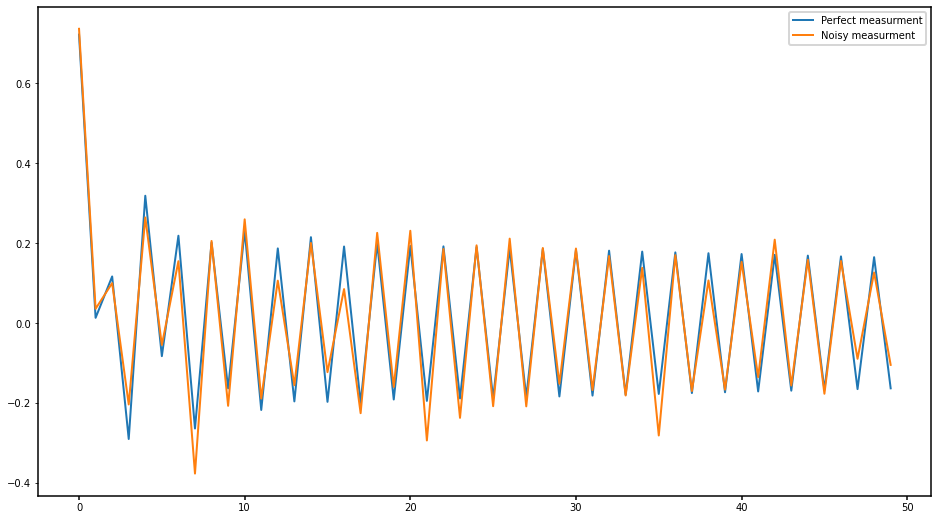

In [65]:
# Numerical application is cool
def gen_autoregressive_ts(order=4, noise_std=1):
    init = np.random.rand()
    init_noisy = init + np.random.normal(loc=0,scale=noise_std)
    params = np.random.rand(order)
    params = params-params.mean()+0.05
    features = np.concatenate((np.zeros(max(0,order-1)),[init]))
    features_noisy = np.concatenate((np.zeros(max(0,order-1)),[init_noisy]))
    
    # Now yield
    yield params, np.zeros(order), np.zeros(order), init, init_noisy
    while True:
        new_val = np.dot(features, params)
        new_val_noisy = new_val+np.random.normal(loc=0,scale=noise_std)
        yield params, features, features_noisy, new_val, new_val_noisy
        features = np.roll(features, -1)
        features[-1] = new_val
        features_noisy = np.roll(features_noisy, -1)
        features_noisy[-1] = new_val_noisy

fig, ax = plt.subplots(figsize=(16,9))
ats = gen_autoregressive_ts(order=4, noise_std=0.04)
y = []
y_noisy = []
for i in range(50):
    _,_,_,v,v_n = next(ats)
    y.append(v)
    y_noisy.append(v_n)
ax.plot(y, label="Perfect measurment")
ax.plot(y_noisy, label="Noisy measurment")
ax.legend()

Recursive and non recursive solution just overlaps perfectly, that's amazing :)


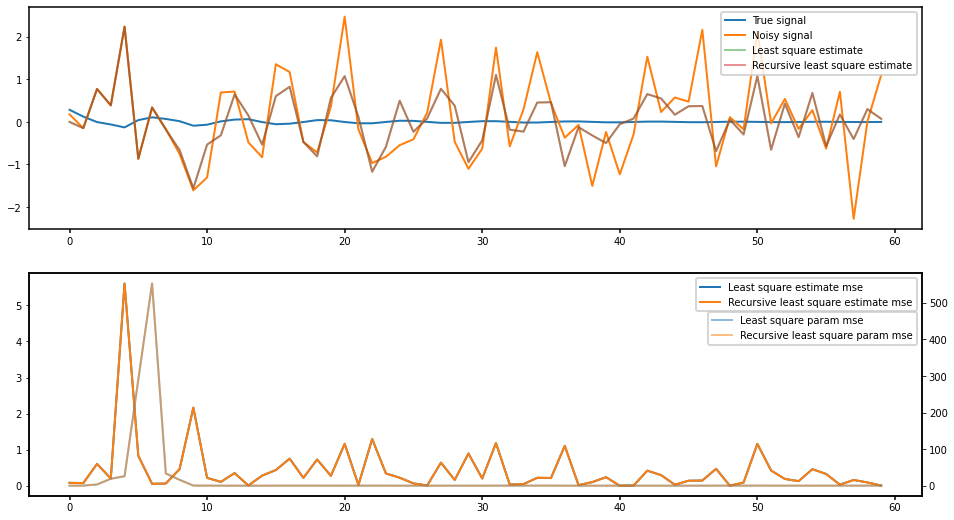

In [84]:
order = 5
lam = 0.90
ats = gen_autoregressive_ts(order=order)

ls_param_estimate = []
ls_param_error = []
ls_estimate = []
ls_estimate_error = []

rls_param_estimate = []
rls_param_error = []
rls_estimate = []
rls_estimate_error = []

Rns = []
dns = []
true_val = []

for i in range(60):
    #print(f"========={i}=========")
    params, features, features_noisy, new_val, new_val_noisy = next(ats)
    #print(params, features, features_noisy, new_val, new_val_noisy)
    Rns.append(features_noisy)
    dns.append(new_val_noisy)
    true_val.append(new_val)
    beta = lam**(np.arange(i+1))[::-1]
    
    if i<=0:
        ls_param_estimate.append(np.zeros(order))
        ls_estimate.append(0)
        ls_estimate_error.append(np.square(0-new_val).mean())
        ls_param_error.append(np.square(np.zeros(order)-params).mean())
        rls_param_estimate.append(np.zeros(order))
        rls_estimate.append(0)
        rls_estimate_error.append(np.square(0-new_val).mean())
        rls_param_error.append(np.square(np.zeros(order)-params).mean())
        continue
    valid = -min(i,order)
        
    # LS part
    Rn = np.array(Rns)
    #print("Rn", Rn)
    dn = np.array(dns)
    B = np.diag(beta)
    #print("B", B)
    An = np.dot(Rn.T, np.dot(B, Rn))[valid:,valid:]
    #print("An", An)
    bn = np.dot(Rn.T, np.dot(B, dn))[valid:]
    #print("bn", bn)
    ls_param_estimate.append(np.concatenate((np.zeros(max(order-i,0)),np.dot(np.linalg.inv(An),bn))))
    ls_estimate.append(np.dot(features_noisy, ls_param_estimate[-1]))
    ls_estimate_error.append(np.square(ls_estimate[-1]-new_val).mean())
    ls_param_error.append(np.square(ls_param_estimate[-1]-params).mean())
    
    # RLS part
    un1 = features_noisy
    if i<=order:
        Anm1 = np.linalg.inv(An)
        bn1 = bn
    else:
        Anm1 = (1/lam)*Anm1-((1/lam)*np.dot(Anm1, np.dot(np.outer(un1,un1),Anm1)))/(lam+np.dot(un1, np.dot(Anm1,un1)))
        en = new_val_noisy*un1
        bn1 = lam*bn1+en
    rls_param_estimate.append(np.concatenate((np.zeros(max(order-i,0)),np.dot(Anm1,bn1))))
    rls_estimate.append(np.dot(features_noisy, rls_param_estimate[-1]))
    rls_estimate_error.append(np.square(rls_estimate[-1]-new_val).mean())
    rls_param_error.append(np.square(rls_param_estimate[-1]-params).mean())

    
fig, ax = plt.subplots(2,1,figsize=(16,9))
ax[0].plot(true_val, label="True signal")
ax[0].plot(dns, label="Noisy signal")
ax[0].plot(ls_estimate, label="Least square estimate",alpha=0.5)
ax[0].plot(rls_estimate, label="Recursive least square estimate", alpha=0.5)
ax[0].legend()

ax[1].plot(ls_estimate_error, label="Least square estimate mse")
ax[1].plot(rls_estimate_error, label="Recursive least square estimate mse")
ax[1].legend()
ax1_twin = ax[1].twinx()
ax1_twin.plot(ls_param_error, label="Least square param mse", alpha=0.5)
ax1_twin.plot(rls_param_error, label="Recursive least square param mse", alpha=0.5)
ax1_twin.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.85))

print("Recursive and non recursive solution just overlaps perfectly, that's amazing :)")